In [22]:
import torch

w_true = torch.Tensor([1, 2, 3])
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)
y = torch.mv(X, w_true) + torch.randn(100) * 0.5
w = torch.randn(3, requires_grad=True)
gamma = 0.1

In [23]:
losses = []

for epoc in range(100):
    w.grad = None
    y_pred = torch.mv(X, w)
    loss = torch.mean((y - y_pred)**2)
    loss.backward()
    w.data = w.data - gamma * w.grad.data
    losses.append(loss.item())

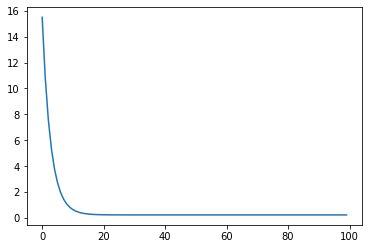

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(losses)

In [25]:
print(w)

tensor([1.1054, 2.0407, 2.9383], requires_grad=True)


In [26]:
from torch import nn, optim

net = nn.Linear(in_features=3, out_features=1, bias=False)
optimizer = optim.SGD(net.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

In [27]:
losses = []
for epoc in range(100):
    optimizer.zero_grad()
    y_pred = net(X)
    loss = loss_fn(y_pred.view_as(y), y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
list(net.parameters())

[Parameter containing:
 tensor([[1.1054, 2.0407, 2.9383]], requires_grad=True)]

In [28]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:100]
y = iris.target[:100]

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

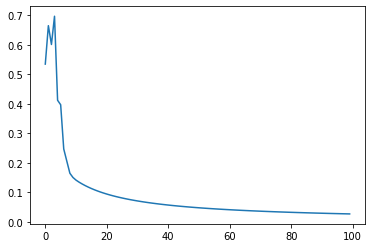

In [29]:
net = nn.Linear(4, 1)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr=0.25)
losses = []
for epoc in range(100):
    optimizer.zero_grad()
    y_pred = net(X)
    loss = loss_fn(y_pred.view_as(y), y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    
plt.plot(losses)

In [30]:
h = net(X)
prob = torch.sigmoid(h)
y_pred = prob > 0.5
(y.byte() == y_pred.view_as(y)).sum().item() / len(y)

1.0

In [157]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

net = nn.Linear(X.size()[1], 10)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [158]:
losses = []

for epoc in range(100):
    optimizer.zero_grad()
    y_pred = net(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

In [160]:
y_pred = torch.argmax(net(X), dim=1)
(y_pred == y).sum().item() / len(y)

0.9482470784641068